# Muhamad Azmi Rizkifar (1301218586)
# IFX-45-GAB

In [35]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from tensorflow import keras

# import sklearn
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [36]:
# data => https://docs.google.com/spreadsheets/d/1DO3jrRwvZQ-RPvUHelN4vfFqaeaGQayB/edit?usp=sharing&ouid=115088001638488993150&rtpof=true&sd=true
!gdown '1DO3jrRwvZQ-RPvUHelN4vfFqaeaGQayB'

Downloading...
From: https://drive.google.com/uc?id=1DO3jrRwvZQ-RPvUHelN4vfFqaeaGQayB
To: /content/arrhythmia.xlsx
100% 454k/454k [00:00<00:00, 67.9MB/s]


In [37]:
# Baca dataset dan tampilkan 5 data pertama
data = pd.read_excel('arrhythmia.xlsx')
features_count_before = len(data.columns)

# Define columns (ambil 20 atribut kolom pertama)
columns = np.array(['Age', 'Sex', 'Height', 'Weight', 'QRS_Duration', 'P_R_Interval', 'Q_T_Interval', 
           'T_Interval', 'P_Interval', 'QRS', 'T', 'P', 'QRST', 'J', 'Heart_Rate', 'Q_Wave', 
           'R_Wave', 'S_Wave', 'R\'_Wave', 'S\'_Wave'])

sisa_columns = len(data.columns) - columns.size
another_columns = np.array(["COL" + str(i + (columns.size + 1)) for i in range(0, sisa_columns)])

# Berikan nama kolom
data.columns = np.concatenate((columns, another_columns))

data.head()

,Age,Sex,Height,Weight,QRS_Duration,P_R_Interval,Q_T_Interval,T_Interval,P_Interval,QRS,...,COL271,COL272,COL273,COL274,COL275,COL276,COL277,COL278,COL279,COL280
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [38]:
# Menampilkan 5 data terakhir
data.tail()

,Age,Sex,Height,Weight,QRS_Duration,P_R_Interval,Q_T_Interval,T_Interval,P_Interval,QRS,...,COL271,COL272,COL273,COL274,COL275,COL276,COL277,COL278,COL279,COL280
447,53.0,1.0,160.0,70.0,80.0,199.0,382.0,154.0,117.0,-37.0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1.0
448,37.0,0.0,190.0,85.0,100.0,137.0,361.0,201.0,73.0,86.0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10.0
449,36.0,0.0,166.0,68.0,108.0,176.0,365.0,194.0,116.0,-85.0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2.0
450,32.0,1.0,155.0,55.0,93.0,106.0,386.0,218.0,63.0,54.0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1.0
451,78.0,1.0,160.0,70.0,79.0,127.0,364.0,138.0,78.0,28.0,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1.0


In [39]:
# show description per feature
data.describe()

,Age,Sex,Height,Weight,QRS_Duration,P_R_Interval,Q_T_Interval,T_Interval,P_Interval,QRS,...,COL271,COL272,COL273,COL274,COL275,COL276,COL277,COL278,COL279,COL280
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [40]:
# cek jumlah baris dan kolom
data.shape

(452, 280)

In [41]:
# getting information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to COL280
dtypes: float64(275), object(5)
memory usage: 988.9+ KB


# **Tahap Pre-Process**
Drop dan replace missing values

In [42]:
# cek missing value pada data
# Output akan menampilkan false, karena tidak ada null value
# (missing value didefinisikan dengan karakter ? pada dataset)
print(data.isnull().values.any())
print(data.isnull().sum().sum())

False
0


In [43]:
# ubah value non number ke NaN
for i in data.columns:
    cnt=0
    for row in data[i]:
        try:
            float(row)
            pass
        except ValueError:
            data.loc[cnt, i] = np.nan
        cnt+=1

In [44]:
# cek kembali missing value pada data (yang terbaca NaN)
print(data.isnull().values.any())

# tampilkan jumlah missing value dalam dataset
print(data.isnull().sum().sum())

True
408


In [45]:
# Tampilkan daftar kolom yang mempunyai missing value
def show_missing_values():
  # get missing values dari dataset
  missing_values = data.columns[data.isnull().any()].tolist()

  if len(missing_values) == 0:
    print('Sudah tidak terdapat missing values')
  else:
    for i in missing_values:
      print('{} => {} missing values'.format(str(i), data[str(i)].isnull().sum()))

In [46]:
# tampilkan daftar missing value dari setiap kolom
show_missing_values()

T => 8 missing values
P => 22 missing values
QRST => 1 missing values
J => 376 missing values
Heart_Rate => 1 missing values


In [47]:
# drop data pada kolom 'T', 'P', dan 'J'
delete = ['T', 'P', 'J']
data.drop(delete, axis=1, inplace=True)

In [48]:
# tampilkan kembali daftar missing value setelah penghapusan data
show_missing_values()

QRST => 1 missing values
Heart_Rate => 1 missing values


In [49]:
# replace missing value pada kolom 'QRST' dan 'Heart_Rate' dengan nilai rata-rata
for i in data.columns[data.isnull().any()].tolist():
  data[str(i)].fillna((data[str(i)].mean()), inplace=True)

In [50]:
# tampilkan kembali daftar missing value setelah penghapusan data
show_missing_values()

# cek kembali missing value pada data (yang terbaca NaN)
print(data.isnull().values.any())

# tampilkan jumlah missing value dalam dataset
print(data.isnull().sum().sum())

Sudah tidak terdapat missing values
False
0


# **Tahap Pre-Process**
Eliminasi fitur yang semua valuenya berisi nilai 0

In [51]:
# Get data yang semua valuenya berisi 0
all_zero_values = data.loc[:, (data == 0).all()]

print(all_zero_values)

     S'_Wave  COL68  COL70  COL84  COL132  COL133  COL140  COL142  COL144  \
0        0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
..       ...    ...    ...    ...     ...     ...     ...     ...     ...   
447      0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
448      0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
449      0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
450      0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
451      0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   

     COL146  COL152  COL157  COL158  COL165  COL205  COL265  COL275  
0    

In [52]:
# drop semua fitur yang semua valuenya = 0
delete_all_zero_val = all_zero_values.columns.tolist()
data.drop(delete_all_zero_val, axis=1, inplace=True)

# tampilkan kembali data yang semua valuenya berisi 0
print(data.loc[:, (data == 0).all()])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[452 rows x 0 columns]


# **Tahap Pre-Process**
Eliminasi fitur yang rasio jumlah nilai 0 nya > 50%

In [53]:
# Get data yang memiliki value berisi 0
zero_values = data.loc[:, (data == 0).any()]

print('Jumlah fitur yang memiliki value nol (0) => {} fitur'.format(len(zero_values.columns)), '\n')
print(zero_values)

Jumlah fitur yang memiliki value nol (0) => 231 fitur 

      Age  Sex  P_R_Interval  P_Interval   QRS  QRST  Q_Wave  R_Wave  S_Wave  \
0    75.0  0.0         193.0       121.0 -16.0  -2.0     0.0    52.0    44.0   
1    56.0  1.0         174.0        39.0  25.0  31.0     0.0    48.0     0.0   
2    54.0  0.0         163.0       102.0  96.0  66.0     0.0    40.0    80.0   
3    55.0  0.0         202.0       143.0  28.0  20.0     0.0    72.0    20.0   
4    75.0  0.0         181.0       103.0 -16.0   3.0     0.0    48.0    40.0   
..    ...  ...           ...         ...   ...   ...     ...     ...     ...   
447  53.0  1.0         199.0       117.0 -37.0 -27.0     0.0    52.0    24.0   
448  37.0  0.0         137.0        73.0  86.0  79.0     0.0    44.0    36.0   
449  36.0  0.0         176.0       116.0 -85.0 -70.0    16.0    40.0    40.0   
450  32.0  1.0         106.0        63.0  54.0  43.0     0.0    56.0     0.0   
451  78.0  1.0         127.0        78.0  28.0  47.0     0.0    

In [54]:
delete_zero_value = []

for i in zero_values:
  # Tampilkan jumlah value nol (0) dari setiap fitur
  print('{} => {} zero values'.format(str(i), (data[str(i)] == 0).sum()))

  # zero value > 50% jumlah data
  if (data[str(i)] == 0).sum() > (len(zero_values) * 0.5):
    delete_zero_value.append(i)

Age => 1 zero values
Sex => 203 zero values
P_R_Interval => 18 zero values
P_Interval => 12 zero values
QRS => 3 zero values
QRST => 6 zero values
Q_Wave => 334 zero values
R_Wave => 3 zero values
S_Wave => 192 zero values
R'_Wave => 448 zero values
COL21 => 3 zero values
COL22 => 451 zero values
COL23 => 447 zero values
COL24 => 447 zero values
COL25 => 450 zero values
COL26 => 450 zero values
COL27 => 448 zero values
COL28 => 347 zero values
COL29 => 2 zero values
COL30 => 197 zero values
COL31 => 442 zero values
COL32 => 450 zero values
COL33 => 2 zero values
COL34 => 444 zero values
COL35 => 439 zero values
COL36 => 451 zero values
COL37 => 450 zero values
COL38 => 450 zero values
COL39 => 445 zero values
COL40 => 253 zero values
COL41 => 43 zero values
COL42 => 239 zero values
COL43 => 418 zero values
COL44 => 447 zero values
COL45 => 43 zero values
COL46 => 451 zero values
COL47 => 436 zero values
COL48 => 451 zero values
COL49 => 444 zero values
COL50 => 447 zero values
COL51 =>

In [55]:
print('Jumlah fitur dengan zero value > 50% = {} dari {} fitur'.format(
    len(delete_zero_value), 
    len(zero_values.columns)
))

# drop fitur yang rasio jumlah nilai 0 nya > 50%
data.drop(delete_zero_value, axis=1, inplace=True)

Jumlah fitur dengan zero value > 50% = 131 dari 231 fitur


In [56]:
# summary pre-process
print('Jumlah semua fitur yang telah di Pre-Process = {} dari {} fitur'.format(
    len(data.columns),
    features_count_before
))

Jumlah semua fitur yang telah di Pre-Process = 129 dari 280 fitur


# **Normalisasi data dan features selection**

In [57]:
# get feature target
cols = data.columns
for i in cols:
    if data[i].max() == 16 and data[i].min() == 1:
        print(i)

COL280


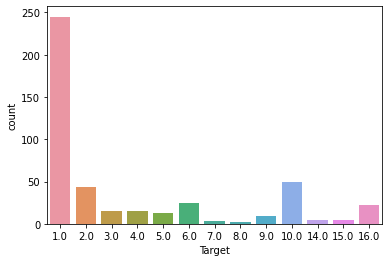

In [58]:
# rename column target & plot target
data.rename(columns={'COL280': 'Target'}, inplace=True)
sns.countplot(x='Target', data=data)

In [59]:
data['Target'].value_counts()

1.0     245
10.0     50
2.0      44
6.0      25
16.0     22
3.0      15
4.0      15
5.0      13
9.0       9
15.0      5
14.0      4
7.0       3
8.0       2
Name: Target, dtype: int64

In [60]:
# Melakukan normalisasi data
x_df = data.loc[:, data.columns != 'Target']
x = np.array(x_df)

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(x)
x_imputer = imputer.transform(x)

df_feature = data.drop('Target' , axis=1)
df_selected_target = data[['Target']]

scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x_imputer)

In [61]:
# features selection dengan chi square
chi2_selector = SelectKBest(chi2, k=80) 
chi2_selector.fit(x_norm, df_selected_target)

cols = chi2_selector.get_support(indices=True)
df_selected_features = df_feature.iloc[:, cols]

ohe = OneHotEncoder()
df_selected_target = ohe.fit_transform(df_selected_target).toarray()

In [62]:
df_selected_features.head()

,Age,Sex,QRS_Duration,Q_T_Interval,T_Interval,P_Interval,Heart_Rate,R_Wave,S_Wave,COL21,...,COL252,COL257,COL258,COL262,COL267,COL269,COL272,COL277,COL278,COL279
0,75.0,0.0,91.0,371.0,174.0,121.0,63.000000,52.0,44.0,32.0,...,15.2,5.1,17.7,13.5,3.9,62.9,9.0,2.9,23.3,49.4
1,56.0,1.0,81.0,401.0,149.0,39.0,53.000000,48.0,0.0,24.0,...,9.5,2.6,11.8,11.0,2.6,43.4,8.5,2.1,20.4,38.8
2,54.0,0.0,138.0,386.0,185.0,102.0,75.000000,40.0,80.0,24.0,...,10.0,2.2,-3.0,11.1,3.4,48.2,9.5,3.4,12.3,49.0
3,55.0,0.0,100.0,380.0,179.0,143.0,71.000000,72.0,20.0,48.0,...,15.0,3.3,28.8,15.2,3.0,68.0,12.2,2.6,34.6,61.6
4,75.0,0.0,88.0,360.0,177.0,103.0,74.463415,48.0,40.0,28.0,...,15.2,4.9,16.2,9.1,2.9,48.9,13.1,3.9,25.4,62.8


In [63]:
df_selected_features.tail()

,Age,Sex,QRS_Duration,Q_T_Interval,T_Interval,P_Interval,Heart_Rate,R_Wave,S_Wave,COL21,...,COL252,COL257,COL258,COL262,COL267,COL269,COL272,COL277,COL278,COL279
447,53.0,1.0,80.0,382.0,154.0,117.0,63.0,52.0,24.0,28.0,...,2.9,1.4,-20.1,4.1,1.0,-0.6,4.3,0.6,-4.4,-0.5
448,37.0,0.0,100.0,361.0,201.0,73.0,73.0,44.0,36.0,24.0,...,22.5,5.9,69.2,21.2,3.7,82.5,15.6,2.4,38.0,62.4
449,36.0,0.0,108.0,365.0,194.0,116.0,84.0,40.0,40.0,40.0,...,20.6,-8.2,-71.2,22.0,-2.5,-63.6,16.3,1.0,-44.2,-33.2
450,32.0,1.0,93.0,386.0,218.0,63.0,80.0,56.0,0.0,32.0,...,11.9,3.8,17.5,15.3,3.2,61.0,12.0,2.4,25.0,46.6
451,78.0,1.0,79.0,364.0,138.0,78.0,75.0,44.0,28.0,24.0,...,23.6,2.4,44.0,12.5,1.7,38.9,10.4,1.6,21.3,32.8


# **Membuat data latih dan test**

In [64]:
# Membuat sampel data latih dan test
x_train, x_test, y_train, y_test = train_test_split(df_selected_features, 
                                                    df_selected_target, 
                                                    test_size=0.2, 
                                                    random_state=24,
                                                    shuffle=True)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (361, 80) (361, 13)
Test set: (91, 80) (91, 13)


In [65]:
x_train

,Age,Sex,QRS_Duration,Q_T_Interval,T_Interval,P_Interval,Heart_Rate,R_Wave,S_Wave,COL21,...,COL252,COL257,COL258,COL262,COL267,COL269,COL272,COL277,COL278,COL279
285,65.0,0.0,85.0,373.0,147.0,143.0,78.0,48.0,36.0,48.0,...,9.8,1.1,-2.7,12.3,0.3,20.3,8.1,-0.5,16.6,12.7
405,21.0,1.0,78.0,363.0,154.0,87.0,69.0,40.0,20.0,20.0,...,11.5,3.0,21.7,8.9,2.8,41.7,7.5,2.5,28.5,49.0
335,47.0,1.0,84.0,379.0,292.0,85.0,76.0,40.0,36.0,40.0,...,8.4,-0.1,9.8,11.6,1.0,28.2,9.8,1.2,19.1,28.7
157,60.0,1.0,93.0,383.0,140.0,86.0,80.0,40.0,56.0,24.0,...,15.3,0.5,-0.9,12.7,0.6,17.7,9.4,0.5,19.6,21.8
380,66.0,0.0,86.0,386.0,243.0,111.0,88.0,40.0,64.0,28.0,...,7.8,0.7,-15.4,6.7,0.2,-5.8,4.7,0.2,-0.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,9.0,0.0,95.0,347.0,156.0,66.0,82.0,40.0,28.0,20.0,...,27.3,3.3,24.8,22.7,3.5,56.3,16.5,3.0,25.3,49.9
343,72.0,0.0,85.0,386.0,148.0,86.0,58.0,52.0,36.0,28.0,...,15.3,1.3,29.2,10.3,0.8,27.1,6.9,0.7,13.9,19.7
192,65.0,0.0,87.0,392.0,137.0,91.0,63.0,72.0,0.0,28.0,...,18.6,-0.9,42.0,16.2,-0.6,38.9,13.9,0.9,44.4,47.8
387,53.0,1.0,86.0,301.0,153.0,79.0,117.0,40.0,32.0,44.0,...,9.3,2.9,11.3,10.1,1.8,33.4,10.8,1.4,25.0,36.4


In [66]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

# **Prediksi**

In [77]:
# Membuat model arsitektur
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=80, input_shape=(80,), activation='relu', name='Input_Layer')) # input layer ada 80 nodes menyesuikan dengan banyaknya feature
model.add(tf.keras.layers.Dense(units=32, activation='relu', name='Hidden_Layer_1')) # menggunakan 2 hidden layer, dengan masing-masing jumlah node sebanyak 32
model.add(tf.keras.layers.Dense(units=32, activation='relu', name='Hidden_Layer_2'))
model.add(tf.keras.layers.Dense(units=1, name='Output_Layer')) # output layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 80)                6480      
                                                                 
 Hidden_Layer_1 (Dense)      (None, 32)                2592      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 10,161
Trainable params: 10,161
Non-trainable params: 0
_________________________________________________________________


In [68]:
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
from ann_visualizer.visualize import ann_viz

ann_viz(model, title="")

In [70]:
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
            print("\n Desired accuracy and validation_accuracy > 90%")
            self.model.stop_training = True

callbacks = callback()

In [71]:
# Compile model
model.compile(loss='mean_absolute_error', 
              optimizer=tf.keras.optimizers.Adam(0.001), 
              metrics=['accuracy'])

# Melakukan fitting model
fitted_model = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=callbacks)

Epoch 1/50
12/12 [==============================] - 1s 30ms/step - loss: 4.0341 - accuracy: 0.4824 - val_loss: 1.7694 - val_accuracy: 0.7464
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 1.5325 - accuracy: 0.6020 - val_loss: 1.2442 - val_accuracy: 0.7092
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 1.2412 - accuracy: 0.6559 - val_loss: 1.0931 - val_accuracy: 0.4489
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 1.1560 - accuracy: 0.5457 - val_loss: 0.8771 - val_accuracy: 0.4768
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7365 - accuracy: 0.6395 - val_loss: 0.6471 - val_accuracy: 0.7557
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 0.5883 - accuracy: 0.7238 - val_loss: 0.6240 - val_accuracy: 0.7836
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.5394 - accuracy: 0.7332 - val_loss: 0.5445 - val_accuracy: 0.7929
Epoch 8/50
12/12 [=

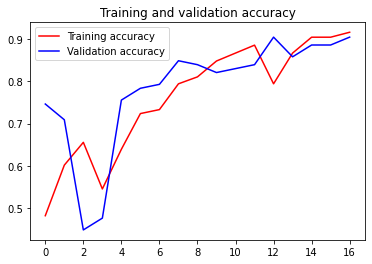

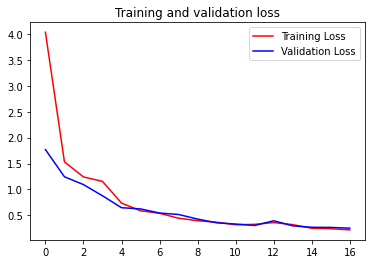

In [72]:
# Plot grafik untuk nilai akurasi dari data training dan test (validation)
accucary = fitted_model.history['accuracy']
validation_accuracy = fitted_model.history['val_accuracy']

plt.plot(accucary, 'red', label='Training accuracy')
plt.plot(validation_accuracy, 'blue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot grafik untuk nilai loss dari data training dan test (validation)
loss = fitted_model.history['loss']
validation_loss = fitted_model.history['val_loss']

plt.plot(loss, 'red', label='Training Loss')
plt.plot(validation_loss, 'blue', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Evaluasi Model**

In [73]:
# evaluasi model
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.25245463848114014
Test accuracy: 0.9044801592826843
